In [61]:
import pandas as pd
import numpy as np

In [62]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [64]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [65]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns

num_cols = num_cols.drop('Person ID')

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)
print(df[cat_cols].nunique())

Categorical columns: Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure',
       'Sleep Disorder'],
      dtype='object')
Numerical columns: Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')
Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     2
dtype: int64


In [66]:
df_processed = df
df_processed['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True) #no diagnosis means no sleep disorder. add that to fill all NAN values
df_processed.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23176\89465992.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True) #no diagnosis means no sleep disorder. add that to fill all NAN values


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [67]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [68]:
df.replace({'Normal Weight':'Normal'}, inplace=True) #normal and normal weight is the same. set all to normal
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [69]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [70]:
BMIs = ['Normal','Overweight','Obese']
print(BMIs)

['Normal', 'Overweight', 'Obese']


In [71]:
#encoding ordinal categorical values

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[BMIs])
ordinal_encoder2 = OrdinalEncoder()
enc = ordinal_encoder.fit_transform(df_processed[['BMI Category']])
enc2 = ordinal_encoder2.fit_transform(df_processed[['Blood Pressure']]) #Blood pressure values are in alphebetic order
df_processed['BMI Category'] = enc

print(df_processed['Blood Pressure'].unique())
df_processed['Blood Pressure'] = enc2
print(df_processed['Blood Pressure'].unique())
df_processed.head()

['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
[11.  9. 22.  6. 18. 16.  2.  4. 13. 17. 12.  0. 19. 14. 15.  1.  5.  7.
 10. 20.  8. 24. 23. 21.  3.]


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,1.0,11.0,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,0.0,9.0,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,0.0,9.0,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,2.0,22.0,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,2.0,22.0,85,3000,Sleep Apnea


In [72]:
#one hot encoding for nominal categorical values

dummies = pd.get_dummies(df_processed[cat_cols], drop_first=True) #remove first entry only from input dummies
print(dummies.head())

   BMI Category  Blood Pressure  Gender_Male  Occupation_Doctor  \
0           1.0            11.0         True              False   
1           0.0             9.0         True               True   
2           0.0             9.0         True               True   
3           2.0            22.0         True              False   
4           2.0            22.0         True              False   

   Occupation_Engineer  Occupation_Lawyer  Occupation_Manager  \
0                False              False               False   
1                False              False               False   
2                False              False               False   
3                False              False               False   
4                False              False               False   

   Occupation_Nurse  Occupation_Sales Representative  Occupation_Salesperson  \
0             False                            False                   False   
1             False                           

In [73]:
df_processed = pd.concat([df[num_cols], dummies], axis=1)
print(df_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               374 non-null    int64  
 1   Sleep Duration                    374 non-null    float64
 2   Quality of Sleep                  374 non-null    int64  
 3   Physical Activity Level           374 non-null    int64  
 4   Stress Level                      374 non-null    int64  
 5   Heart Rate                        374 non-null    int64  
 6   Daily Steps                       374 non-null    int64  
 7   BMI Category                      374 non-null    float64
 8   Blood Pressure                    374 non-null    float64
 9   Gender_Male                       374 non-null    bool   
 10  Occupation_Doctor                 374 non-null    bool   
 11  Occupation_Engineer               374 non-null    bool   
 12  Occupati

In [74]:
df_processed.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category,Blood Pressure,Gender_Male,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_No Sleep Disorder,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,6,77,4200,1.0,11.0,True,...,False,False,False,False,False,False,True,False,True,False
1,28,6.2,6,60,8,75,10000,0.0,9.0,True,...,False,False,False,False,False,False,False,False,True,False
2,28,6.2,6,60,8,75,10000,0.0,9.0,True,...,False,False,False,False,False,False,False,False,True,False
3,28,5.9,4,30,8,85,3000,2.0,22.0,True,...,False,False,False,True,False,False,False,False,False,True
4,28,5.9,4,30,8,85,3000,2.0,22.0,True,...,False,False,False,True,False,False,False,False,False,True


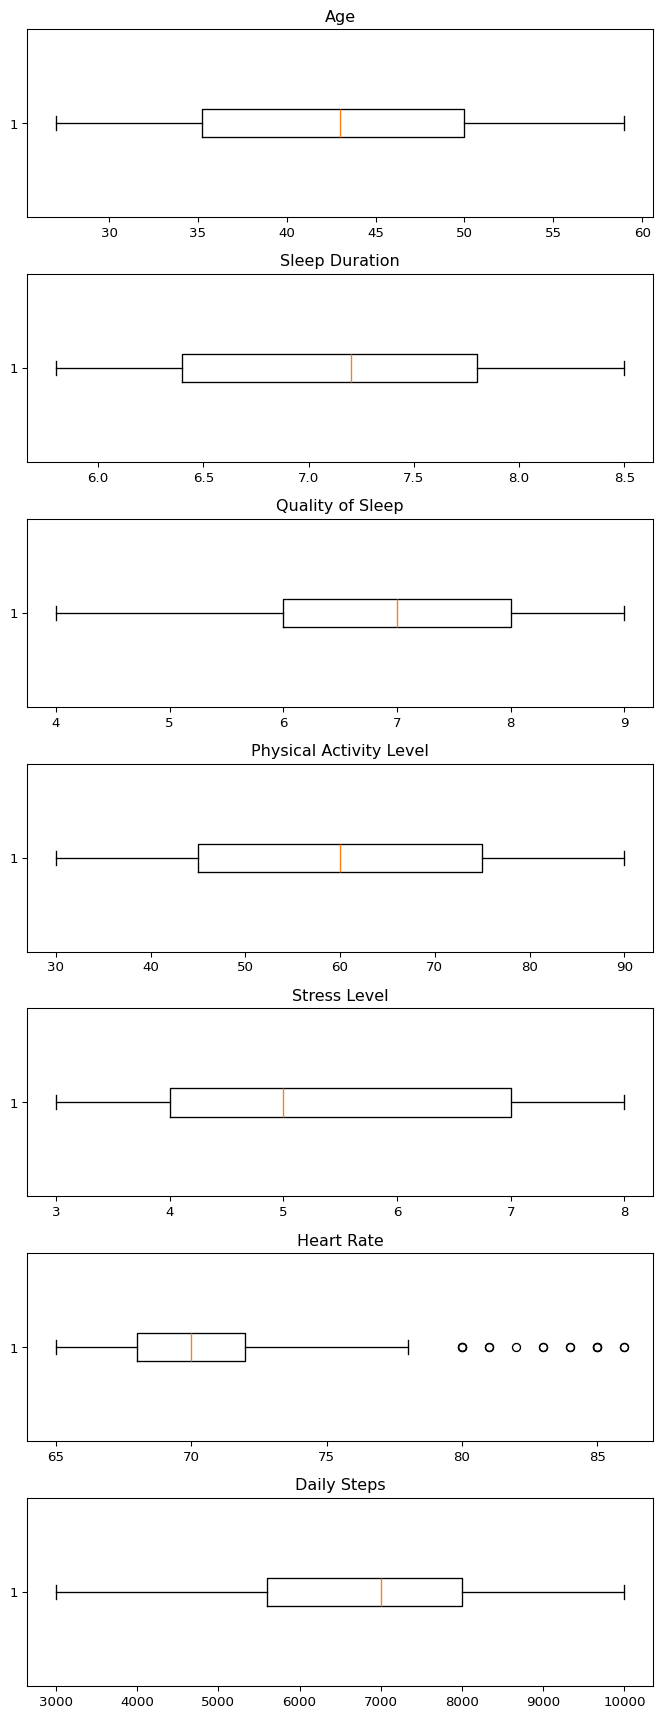

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(df_processed[num_cols].columns), 1, figsize=(7, 18), dpi=96)
for i, col in enumerate(df_processed[num_cols].columns):
    ax[i].boxplot(df_processed[num_cols][col], vert=False)
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

In [76]:
q1, q3 = np.percentile(df_processed['Heart Rate'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
cleaned_df = df_processed[(df_processed['Heart Rate'] >= lower_bound) & (df_processed['Heart Rate'] <= upper_bound)]
print(f"Original shape: {df_processed.shape}, Cleaned shape: {cleaned_df.shape}")

#check if removing heart rate outliers removes all entries with BMI Category 2 (Obese)

Heartrate_outliers =  df_processed['Heart Rate'] >= upper_bound
Obese = df_processed['BMI Category'] == 2

print(Heartrate_outliers.sum())
print(Obese.sum())
print((Obese & Heartrate_outliers).sum())

cleaned_obese = cleaned_df['BMI Category'] == 2
print('After cleaning obese sum = ' , cleaned_obese.sum())

#removing all heartrate outliers removes all obese entries. so they will not be removed

cleaned_df = df_processed
cleaned_df.describe()

Lower Bound: 62.0, Upper Bound: 78.0
Original shape: (374, 22), Cleaned shape: (359, 22)
20
10
10
After cleaning obese sum =  0


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category,Blood Pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,0.449198,13.114973
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,0.549274,7.100590
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000,0.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,0.000000,9.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,0.000000,15.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,1.000000,20.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,2.000000,24.000000


In [77]:
df_processed.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category,Blood Pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,0.449198,13.114973
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,0.549274,7.100590
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000,0.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,0.000000,9.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,0.000000,15.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,1.000000,20.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,2.000000,24.000000


In [78]:
cleaned_df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category,Blood Pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,0.449198,13.114973
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,0.549274,7.100590
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,0.000000,0.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,0.000000,9.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,0.000000,15.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,1.000000,20.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,2.000000,24.000000


In [79]:
X = cleaned_df.drop(columns=['Stress Level'])
y = cleaned_df['Stress Level']
print(X.shape, y.shape)
X.head()

(374, 21) (374,)


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,BMI Category,Blood Pressure,Gender_Male,Occupation_Doctor,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_No Sleep Disorder,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,77,4200,1.0,11.0,True,False,...,False,False,False,False,False,False,True,False,True,False
1,28,6.2,6,60,75,10000,0.0,9.0,True,True,...,False,False,False,False,False,False,False,False,True,False
2,28,6.2,6,60,75,10000,0.0,9.0,True,True,...,False,False,False,False,False,False,False,False,True,False
3,28,5.9,4,30,85,3000,2.0,22.0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,28,5.9,4,30,85,3000,2.0,22.0,True,False,...,False,False,False,True,False,False,False,False,False,True


In [80]:
y.head()

0    6
1    8
2    8
3    8
4    8
Name: Stress Level, dtype: int64

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = [col for col in X.columns if X[col].dtype != 'object']
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,BMI Category,Blood Pressure,Gender_Male,Occupation_Doctor,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Sleep Disorder_No Sleep Disorder,Sleep Disorder_Sleep Apnea
0,0.00000,0.111111,0.4,0.2,0.571429,0.171429,0.5,0.458333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.03125,0.148148,0.4,0.5,0.476190,1.000000,0.0,0.375000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.03125,0.148148,0.4,0.5,0.476190,1.000000,0.0,0.375000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.03125,0.037037,0.0,0.0,0.952381,0.000000,1.0,0.916667,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.03125,0.037037,0.0,0.0,0.952381,0.000000,1.0,0.916667,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
X.to_csv('sleephealth_X_processed.csv', index=False)
y.to_csv('sleephealth_y_processed.csv', index=False)

# Save the scaler for future use
#import joblib
#joblib.dump(scaler, 'scaler.save')